## Inferential analysis

Dado que en el análisis anterior he averiguado cuales son los géneros más exitosos para cada año, para esos datos voy a intentar predecir cual será la ganancia del género mas exitoso en algún año futuro partiendo de los datos recopilados y las distintas variables.

Given that in the previous analysis, I have determined the most successful genres for each year, I will now attempt to predict the earnings of the most successful genre in a future year based on the collected data and various variables.

Empiezo por importar los datos generados en la sección anterior.


I begin by importing the data generated in the previous section.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

general_data = pd.read_csv('updated_data/indexGeneral.csv')
gen = pd.read_csv('updated_data/genres.csv')
general_table = pd.read_csv('updated_data/resume_table.csv')

Creo un nuevo data frame para añadir las columnas del año y del género.

I create a new data frame to add the columns for the year and the genre.

In [2]:
copy_general = general_data
copy_general['Year'] = None
copy_general['Genre'] = None
copy_general['Release'] = pd.to_datetime(copy_general['Release'], format='%Y-%m-%d')
copy_general['Year'] = general_data['Release'].dt.year
mapeo = gen.set_index('id')['Genre'].to_dict()
copy_general['Genre'] = copy_general['id_genre'].map(mapeo).fillna(copy_general['Genre'])

Después esos datos los llevo a otra tabla donde puse las ganancias generales del año, las ganancias totales del género más exitoso, el total de peliculas evaluadas ese año, el total de películas del género que más ganó y reemplazo el género por un valor númerico para poder hacer una regresión lineal.

Then, I transfer this data to another table where I included the overall earnings of the year, the total earnings of the most successful genre, the total number of evaluated movies that year, the total number of movies of the genre that earned the most, and I replace the genre with a numerical value to perform a linear regression.

In [3]:
table_model = general_table
for n in range(len(table_model)):
    table_model.at[n,'General Gross'] = copy_general.loc[copy_general['Year'] == 2000+n, 'Gross'].sum()
for n in range(len(table_model)):
    table_model.at[n,'General Movie Count'] = copy_general.loc[copy_general['Year'] == 2000+n, 'Movie'].count()
for n in range(len(table_model)):
    table_model.at[n,'Movie by Genre Count'] = copy_general.loc[(copy_general['Year'] == 2000+n) & 
                                            (copy_general['Genre'] == table_model.at[n,'Genre']), 'Movie'].count()  

table_model["Genre"] = table_model["Genre"].map({"Comedy":0, "Adventure":1, "Action":2})
table_model

,Year,Genre,Total Genre Gross,General Gross,General Movie Count,Movie by Genre Count
0,2000,0,1.600586e+09,7.399258e+09,195.0,44.0
1,2001,1,2.012124e+09,7.998313e+09,196.0,22.0
2,2002,1,2.900425e+09,8.502773e+09,186.0,30.0
3,2003,0,2.018149e+09,8.096038e+09,194.0,39.0
4,2004,1,2.749105e+09,8.941956e+09,189.0,28.0
5,2005,1,2.172847e+09,8.336182e+09,191.0,21.0
6,2006,1,2.594192e+09,8.927918e+09,194.0,25.0
7,2007,1,2.784300e+09,9.406028e+09,187.0,21.0
8,2008,1,2.596511e+09,9.397212e+09,187.0,27.0
9,2009,1,2.671019e+09,1.086371e+10,188.0,28.0


Hago una visualización de la tabla para determinar que no hay algún error y que los datos se corresponden con los capturados para después crear el modelo de regresión lineal.

I create a visualization of the table to ensure that there are no errors and that the data corresponds to what was captured. This is done before proceeding to create the linear regression model.

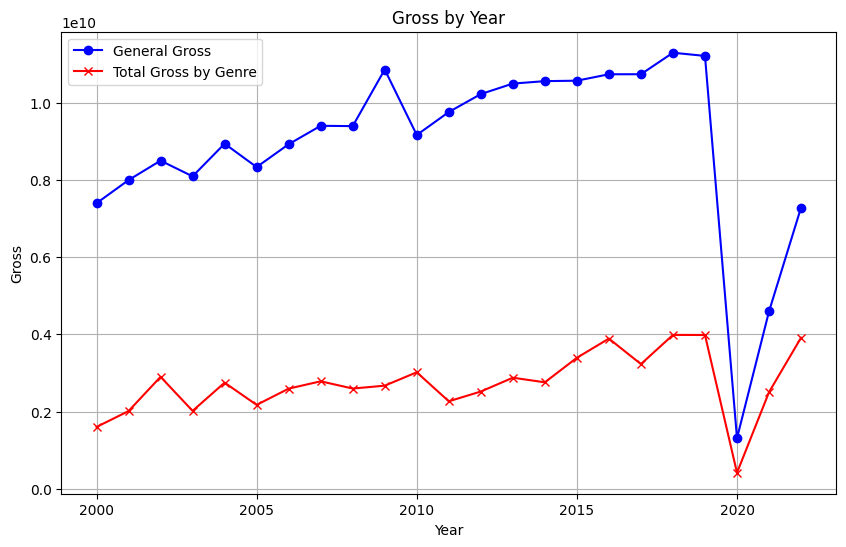

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(table_model['Year'], table_model['General Gross'], label='General Gross', marker='o', color='b')
plt.plot(table_model['Year'], table_model['Total Genre Gross'], label='Total Gross by Genre', marker='x', color='r')
plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Gross by Year')
plt.legend()
plt.grid(True)
plt.show()

En la gráfica anterior podemos apreciar la suma de las ganancias totales de cada año comparadas con la suma de las ganancias del género más exitoso.

In the previous graph, we can observe the sum of total earnings for each year compared to the sum of earnings of the most successful genre.

Para generar un modelo de regresión lineal que intente predecir las ganancias totales del genero mas exitoso especifico las variables inependientes en X y la variavle dependiente en Y para después especificar que necesitoque de esos datos el ochenta por ciento van a ser mis datos de entrenamiento y el restante mis datos de test.

To generate a linear regression model that attempts to predict the total earnings of the most successful genre, I specify the independent variables in X and the dependent variable in Y. Then, I indicate that I need 80% of this data for training and the remaining 20% for testing.

In [5]:
X = table_model[['Year','Genre','General Gross','General Movie Count','Movie by Genre Count']]
y = table_model['Total Genre Gross']

X_train,X_test,y_train,y_test = train_test_split(X, y.values.reshape(-1,1), train_size = 0.8, random_state = 1234,shuffle = True)

In [6]:
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     7.725
Date:                Mon, 07 Aug 2023   Prob (F-statistic):            0.00185
Time:                        11:24:18   Log-Likelihood:                -383.28
No. Observations:                  18   AIC:                             778.6
Df Residuals:                      12   BIC:                             783.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.457e+11 

C:\Users\elper\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Según los datos desplegados el valor de R-squared es aceptable para hacer una regresión lineal y tomando en cuenta los valores P podemos decir que las únicas variables significativas para la construcción de nuestro modelo son 'Year' y 'General Gross' por lo que se realizara un nuevo modelo excluyendo las otras variables que superan el 0.05.

Based on the displayed data, the value of R-squared is acceptable for conducting linear regression. Taking into account the P-values, we can conclude that the only significant variables for constructing our model are 'Year' and 'General Gross'. Therefore, a new model will be built excluding the other variables that have P-values exceeding 0.05.

In [7]:
X_train = X_train.drop(columns = ['Movie by Genre Count','General Movie Count','Genre'])
X_test  = X_test.drop(columns = ['Movie by Genre Count','General Movie Count','Genre'])

X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     21.05
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           4.43e-05
Time:                        11:24:18   Log-Likelihood:                -384.21
No. Observations:                  18   AIC:                             774.4
Df Residuals:                      15   BIC:                             777.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.39e+11   3.82e+10     -3.640

C:\Users\elper\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


La ecuación de regresión ajustada es:

The adjusted regression equation is:

$$Genre Gross = -139000000000 + 6.9210000\times\text{Year} + 0.2809\times\text{General Gross}$$

Una vez construido el nuevo modelo se calcula el rango donde van a a estar nuestros intervalos de confianza de los coeficientes de la ecuación anterior.

Once the new model has been constructed, the range where our confidence intervals for the coefficients of the previous equation will be located is calculated.

In [8]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-2.204325e+11,-5.762341e+10
Year,2.884877e+07,1.095812e+08
General Gross,1.796378e-01,3.820687e-01


Finalmente utilizando el modelo construido podemos hacer una predicción de las ganancias que obtendrá el género más exitoso en este caso del año 2023 suponiento que se tiene una ganancia general estimada de 10000000000 dólares.

Finally, using the constructed model, we can make a prediction of the earnings that the most successful genre will achieve, in this case for the year 2023, assuming an estimated overall earnings of 10,000,000,000 dollars.

In [9]:
X_new = pd.DataFrame({'const':[1], 'Year':[2023], 'General Gross':[10000000000]})
pred = modelo.get_prediction(exog = X_new).summary_frame(alpha=0.05)
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.802464e+09,2.408899e+08,3.289019e+09,4.315908e+09,2.631925e+09,4.973002e+09


En este caso nos arroja un estimado de unos 3800 millones de dólares independientemente del género más popular con un error estimado de 240 millones de dolares, aunque para hacer este supuesto tendríamos que hacer una predicción para el estimado de las ganancias totales del siguiente año.

In this case, it gives us an estimate of around 3.8 billion dollars regardless of the most popular genre, with an estimated error of 240 million dollars. However, to make this assumption, we would need to predict the estimated total earnings for the next year.

In [10]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
np.sqrt(rmse)

22381.317257932256

Cabe resaltar que para el modelo construido, se estima que el cálculo de la predicción se aleje del valor real por unos 22381 dólares

It's worth noting that for the constructed model, the prediction calculation is estimated to deviate from the actual value by around 22,381 dollars.

Para determinar si la ganancia final de una pelicula tiene alguna correlación con el género, el distribuidor o el mes de lanzamiento construyo un nuevo data frame que contenga esos datos, asignandole valores numéricos a las variables.

To determine if the final earnings of a movie have any correlation with the genre, distributor, or release month, I am constructing a new data frame containing this data, assigning numerical values to the variables.

In [11]:
general_data = pd.read_csv('updated_data/indexGeneral.csv')
gen = pd.read_csv('updated_data/genres.csv')
dis = pd.read_csv('updated_data/distributors.csv')
general_table = pd.read_csv('updated_data/resume_table.csv')
copy_general = general_data
copy_general['Genre'] = None
copy_general['Distributor'] = None
copy_general['Year'] = None
gen['num_value'] = None
dis['num_value'] = None
gen['num_value'] = range(1, len(gen) + 1)
dis['num_value'] = range(1, len(dis) + 1)
copy_general['Release'] = pd.to_datetime(copy_general['Release'], format='%Y-%m-%d')
copy_general['Month'] = general_data['Release'].dt.month
copy_general['Release'] = pd.to_datetime(copy_general['Release'], format='%Y-%m-%d')
copy_general['Year'] = general_data['Release'].dt.year
mapeo = gen.set_index('id')['num_value'].to_dict()
copy_general['Genre'] = copy_general['id_genre'].map(mapeo).fillna(copy_general['Genre'])
mapeo = dis.set_index('id')['num_value'].to_dict()
copy_general['Distributor'] = copy_general['id_distributor'].map(mapeo).fillna(copy_general['Distributor'])
del copy_general['id_distributor']
del copy_general['id_genre']
del copy_general['Movie']
del copy_general['Release']
copy_general = copy_general.dropna().reset_index(drop=True)
copy_general

,Gross,Genre,Distributor,Year,Month
0,2.601968e+08,1.0,3.0,2000,11
1,2.336321e+08,1.0,5.0,2000,12
2,2.154099e+08,2.0,6.0,2000,5
3,1.876982e+08,2.0,11.0,2000,5
4,1.828084e+08,7.0,6.0,2000,12
...,...,...,...,...,...
4030,2.585450e+05,3.0,646.0,2022,10
4031,2.515860e+05,6.0,1214.0,2022,12
4032,2.361530e+05,3.0,6.0,2022,9
4033,2.299210e+05,5.0,61.0,2022,1


In [12]:
correl = copy_general['Gross'].corr(copy_general['Genre'])
correl 

-0.2460964420354606

In [13]:
correl = copy_general['Gross'].corr(copy_general['Distributor'])
correl 

-0.15965420951820886

In [14]:
correl = copy_general['Gross'].corr(copy_general['Month'])
correl 

0.0465969249824687

Dado que ningún valor de los anteriores es cercano a 1 o -1 podemos decir que las ganancias de cada película dependen muy poco de las variables escogidas (género, distribuidor y mes).

Since none of the values from the above are close to 1 or -1, we can conclude that the earnings of each movie are not strongly dependent on the chosen variables (genre, distributor, and month).

Para intentar indagar un poco más acerca de si estas variables influían en las ganancias finales de una película intenete construir un nuevo modelo aplicando una escala logarítmica a los valores obtenidos de mi tabla anterior ya que esta fue la manera en que mi coeficiente de determinación, sin embargo no se acercaba tanto a 1. Estos fueron mis resultados.

To further investigate whether these variables influence the final earnings of a movie, I attempted to build a new model by applying a logarithmic scale to the values obtained from my previous table. This was done because it was the way my coefficient of determination approached 1. Here are my results.

In [15]:
copy_general['Gross'] = np.log(copy_general['Gross'])
copy_general['Distributor'] = np.log(copy_general['Distributor'])
copy_general 

,Gross,Genre,Distributor,Year,Month
0,19.376949,1.0,1.098612,2000,11
1,19.269258,1.0,1.609438,2000,12
2,19.188053,2.0,1.791759,2000,5
3,19.050346,2.0,2.397895,2000,5
4,19.023949,7.0,1.791759,2000,12
...,...,...,...,...,...
4030,12.462825,3.0,6.470800,2022,10
4031,12.435540,6.0,7.101676,2022,12
4032,12.372235,3.0,1.791759,2022,9
4033,12.345491,5.0,4.110874,2022,1


In [16]:
from sklearn.model_selection import train_test_split


X = copy_general[['Genre','Distributor','Year','Month']]
y = copy_general['Gross']

X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size   = 0.8, random_state = 1234,shuffle = True)

In [17]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     485.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:24:18   Log-Likelihood:                -5509.6
No. Observations:                3228   AIC:                         1.103e+04
Df Residuals:                    3223   BIC:                         1.106e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.1842      7.165      8.121      

Como conclusión me parece que se debe de usar otro modelo de regresión, por que a pesar de que lo valores de P son practicamente 0 puede que se deba a una aplicación incorrecta del modelo.

As a conclusion, it seems that another regression model should be considered. Despite the fact that the P-values are almost 0, it's possible that this could be due to an incorrect application of the model.

In [19]:
table_model.to_csv('tablemodel.csv', index=False)